# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ตัวเลขอารบิคเขียนด้วยลายมือ

In [3]:
path = untar_data(URLs.MNIST)

# 3. เตรียมข้อมูล



In [4]:
batchsize = 720
np.random.seed(0)
transform = get_transforms(do_flip=False)

databunch = ImageDataBunch.from_folder(path, train='training', 
                                       valid_pct=0.2, size=28, 
                                       ds_tfms=transform, bs=batchsize, 
                                       num_workers=8).normalize()

# 4. สร้างโมเดล

เพื่อความสะดวก เราจะไปสร้างก่อน fit แต่ละแบบ

pretrained=False หมายถึง เราจะเริ่มเทรนตั้งแต่ต้น ไม่เอา Weight ที่เคยเทรนกับ ImageNet มาแล้วมาใช้

In [5]:
# learner = cnn_learner(databunch, models.resnet18, 
#                       pretrained=False, 
#                       metrics=accuracy, callback_fns=ShowGraph)

# 5. เริ่มต้นเทรนโมเดล

ปกติ Learning Rate จะมีค่า Default ประมาณ 3e-3 หรือ 0.003 เราจะลองเทรนด้วย Learning Rate สูงมาก และต่ำมาก เปรียบเทียบกับ [Image Classification ep.3](https://www.bualabs.com/archives/509/mnist-fastai-resnet18-image-classification-ep-3/) ดูว่าจะเป็นอย่างไร

## ลองเทรนด้วย Learning Rate สูง ๆ เช่น 0.9

epoch,train_loss,valid_loss,accuracy,time
0,25.930954,17.993773,0.163214,00:15
1,5.369255,8.539187,0.202857,00:13
2,1.275627,1229.385376,0.108500,00:13
3,0.426553,0.508241,0.828643,00:13
4,77.161812,350373120.000000,0.094357,00:13
5,39.631905,12.652226,0.390929,00:13
6,9.128436,3.253814,0.421643,00:13
7,2.075396,2.917151,0.240071,00:13


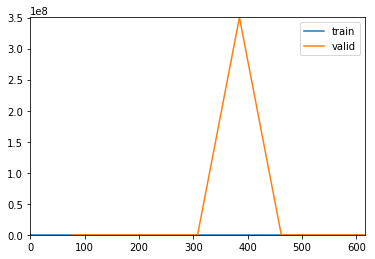

In [6]:
learner = cnn_learner(databunch, models.resnet18, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(8, lr=0.9)

Weight ของ Model ถูกลบด้วยค่าที่ใหญ่เกินไป ซ้ำ ๆ เหมือนถูกระเบิดออก ทำให้ Loss กระเด้งไปมา ไม่ลงสู่จุดต่ำ ทำให้ accuracy ที่เคยได้ 98% กลายเป็น 20-40%

บางที Weight ระเบิดมากเกินกว่าที่ตัวเลขในคอมพิวเตอร์ จะรับได้ จะกลายเป็นค่า NaN หรือ Not a Number ต้อง Restart และเทรนใหม่ตั้งแต่ต้น

## ลองเทรนด้วย Learning Rate ต่ำ ๆ เช่น 0.000001

epoch,train_loss,valid_loss,accuracy,time
0,2.726320,2.318783,0.173500,00:13
1,2.582279,2.111158,0.259214,00:13
2,2.424541,1.924421,0.345071,00:13
3,2.265609,1.757097,0.419143,00:13
4,2.118293,1.605850,0.484500,00:13
5,1.980151,1.469698,0.545500,00:13
6,1.858858,1.345646,0.595357,00:13
7,1.739320,1.235045,0.641143,00:13


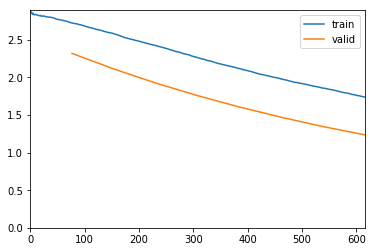

In [7]:
learner = cnn_learner(databunch, models.resnet18, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(8, lr=0.000001)

Weight ของ Model ถูกลบด้วยค่าที่เล็กเกินไป ทำให้ Loss ไม่ขยับไปไหน 

## ลองเทรนด้วย Epoch น้อยเกินไป หรือ เทรนสั้นเกินไป

epoch,train_loss,valid_loss,accuracy,time
0,0.171779,0.138354,0.955929,00:13


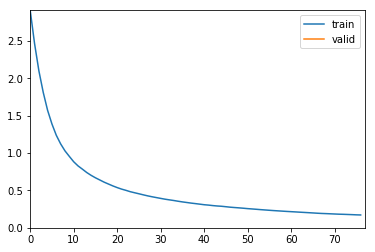

In [8]:
learner = cnn_learner(databunch, models.resnet18, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(1, lr=0.003)

เทรนสั้นไป ยังไม่ได้อัพเดท Weight สักเท่าไร ทำให้ Loss ไม่ขยับไปไหน 

## ลองเทรนด้วย Epoch เยอะเกินไป หรือ เทรนนานเกินไป

epoch,train_loss,valid_loss,accuracy,time
0,0.188304,0.190220,0.942429,00:13
1,0.098342,0.107233,0.967214,00:13
2,0.076289,0.085952,0.974571,00:13
3,0.061659,0.142723,0.956571,00:13
4,0.057108,0.055806,0.983714,00:13
5,0.053324,0.049478,0.984643,00:13
6,0.048939,0.079429,0.977214,00:14
7,0.045375,0.051495,0.985500,00:13
8,0.044308,0.068941,0.978643,00:13
9,0.044108,0.068600,0.979929,00:14


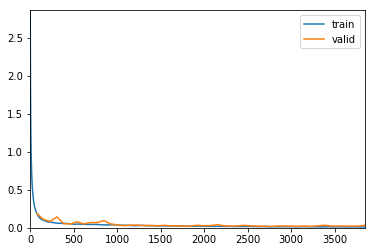

In [9]:
learner = cnn_learner(databunch, models.resnet18, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph)
learner.fit(50, lr=0.003)

เทรนนานเกินไป ผลลัพธ์ก็ไม่ได้ดีขึ้น บางทีอาจจะทำให้ Overfit ซึ่งไว้เราจะอธิบายต่อไป

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 2](https://course.fast.ai/videos/?lesson=2)